## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


## Question 1
### Is the distribution of body temperatures normal? 

In [6]:
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


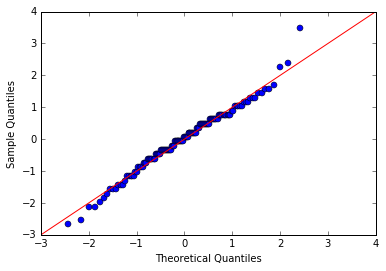

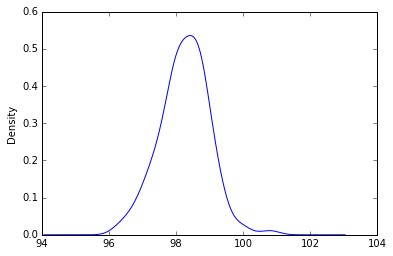

In [16]:
%pylab inline
fig = sm.qqplot(df.temperature, fit=True, line='45')
plt.show()
df['temperature'].plot(kind='kde')

Given the above QQ plot, we can conclude that the sample is normally distributed. The density plot confirms, though there is the slight bump on the right.

## Question 2
### Is the true population mean really 98.6 degrees F?

Given that we are operating under the normal assumption for this data set, the z-test is the appropriate test.

Recall

$$Z = \frac{\bar{x} - \mu}{SE}$$

In using a t-Test, the data would follow a t-Distribution instead of normal.

Specifically, we are testing 
$$
H_0: \mu = 98.6 \\
H_A: \mu \neq 98.6
$$

In [28]:

std_err = stats.sem(df['temperature'])

Z = (df['temperature'].mean()-98.6) / std_err

Z

-5.4548232923640789

If we take this Z-score and convert it to a p-value, we get

In [44]:
round(1-stats.norm.cdf(abs(Z)), 4)

0.0

Given this very small p-value, we can reject the null hypothesis that $\mu=98.6$

## Question 3
### At what temperature should we consider someone's temperature to be "abnormal"?

To construct a sense of "normal" we can start with the point estimate of the population mean.

In [45]:
df['temperature'].mean()

98.249230769230778

Then we can construct a 95% confidence interval around it, using the standard formula

$$ \bar{X} \pm 1.96 \times \frac{s}{\sqrt{n}} $$

where $\bar{x}$ is our sample mean and $s$ is our estimated standard deviation, since we don't know the true standard deviation of temperatures. We use 1.96 because that is the critical value of a $t$ distribution with 130 d.f. as we have here.

In [60]:
lower_bound = df['temperature'].mean() - 1.96 * (df['temperature'].std() / 
                                                 sqrt(df['temperature'].count()))

upper_bound = df['temperature'].mean() + 1.96 * (df['temperature'].std() / 
                                                 sqrt(df['temperature'].count()))

print "The confidence interval is ({:.5}, {:.5})".format(lower_bound, upper_bound)

The confidence interval is (98.123, 98.375)


Thus, if someone falls outside this range, we would consider them to be abnormal. (That said, don't call your doctor for 98.4)

## Question 4
### Is there a significant difference between males and females in normal temperature?

In [63]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

We can now run a t-test to compare the means of these two samples. We can assume the variance is equal, since we have no reason to believe otherwise. 

In [68]:
print "t-test results:\n\tt-Statistic: {}\n\tp-value: {}".format(stats.ttest_ind(males['temperature'], females['temperature'])[0],
                                                                 stats.ttest_ind(males['temperature'], females['temperature'])[1])

t-test results:
	t-Statistic: -2.28543453817
	p-value: 0.0239318831224


Thus, we see that there is a significant difference between the two group means at the $\alpha=0.05$ level.